<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>



#### Import the required libraries we need for the lab.


In [1]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

In [2]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pyplot
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

#### Read the dataset in the csv file from the URL


In [3]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [4]:
boston_df=pd.read_csv(boston_url)

#### Add your code below following the instructions given in the course to complete the peer graded assignment


Task 1: Become familiar with the dataset

In [15]:
boston_df

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,9.67,22.4
502,502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,9.08,20.6
503,503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,5.64,23.9
504,504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,6.48,22.0


Task 2: Generate Descriptive Statistics and Visualizations


For the "Median value of owner-occupied homes" provide a boxplot

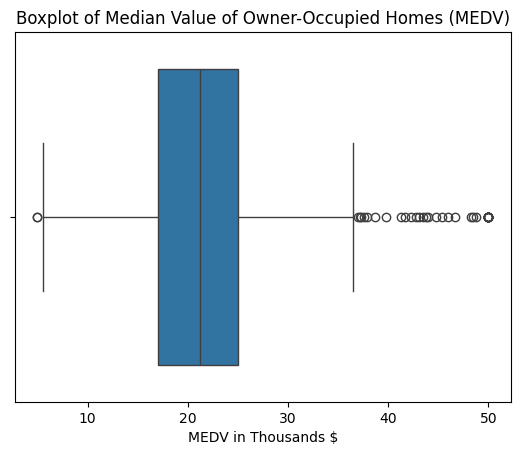

In [17]:
ax = sns.boxplot(x='MEDV', data=boston_df)
pyplot.title('Boxplot of Median Value of Owner-Occupied Homes (MEDV)')
pyplot.xlabel('MEDV in Thousands $')
pyplot.show()

Provide a  bar plot for the Charles river variable


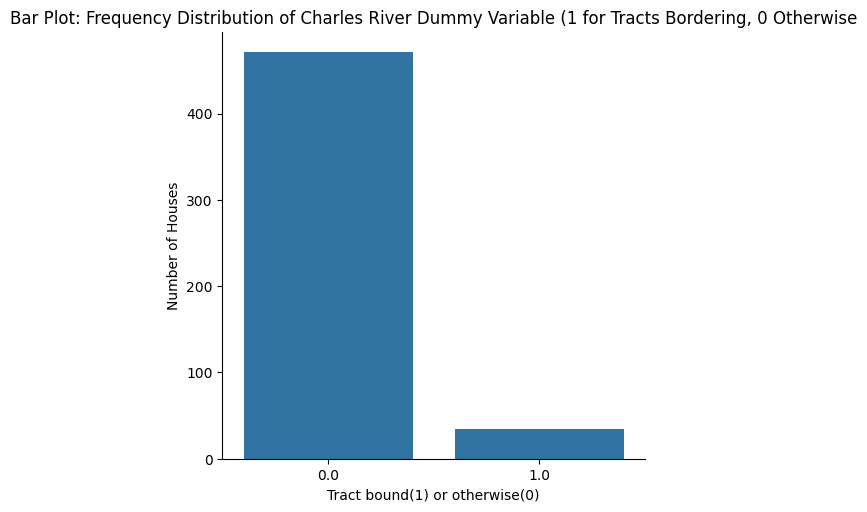

In [18]:
ax = sns.catplot(x='CHAS',kind='count', data=boston_df)
pyplot.title('Bar Plot: Frequency Distribution of Charles River Dummy Variable (1 for Tracts Bordering, 0 Otherwise')
pyplot.xlabel("Tract bound(1) or otherwise(0)")
pyplot.ylabel('Number of Houses')
pyplot.show()

Provide a boxplot for the MEDV variable vs the AGE variable. (Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older)

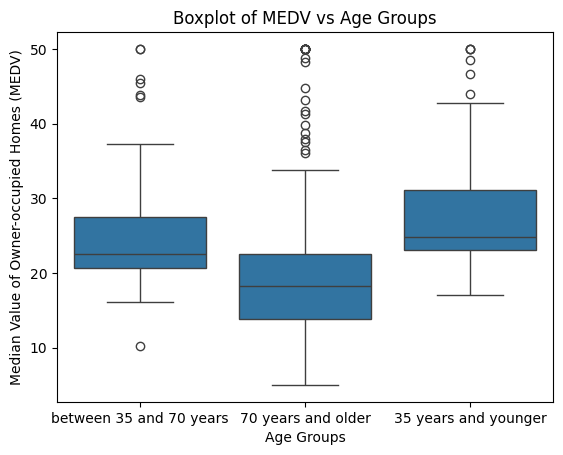

In [20]:
boston_df.loc[(boston_df['AGE'] <= 35), 'age_group'] = '35 years and younger'
boston_df.loc[(boston_df['AGE'] > 35) & (boston_df['AGE'] < 70), 'age_group'] = 'between 35 and 70 years'
boston_df.loc[(boston_df['AGE'] >= 70), 'age_group'] = '70 years and older'
ax = sns.boxplot(x='age_group', y='MEDV', data=boston_df)
pyplot.title('Boxplot of MEDV vs Age Groups')
pyplot.xlabel('Age Groups')
pyplot.ylabel('Median Value of Owner-occupied Homes (MEDV)')
pyplot.show()

Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town. What can you say about the relationship?

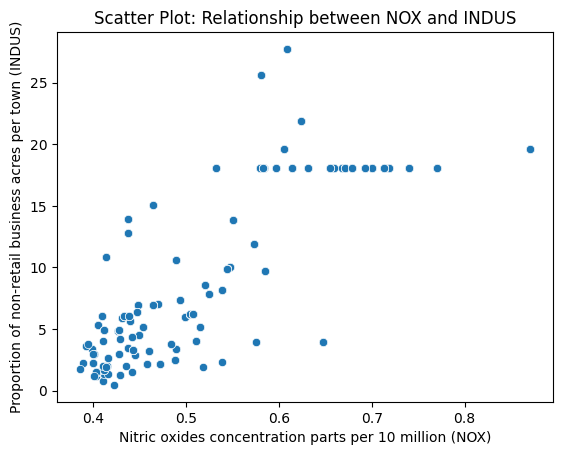

In [21]:
ax = sns.scatterplot(x='NOX', y='INDUS', data=boston_df)
pyplot.title('Scatter Plot: Relationship between NOX and INDUS')
pyplot.xlabel('Nitric oxides concentration parts per 10 million (NOX)')
pyplot.ylabel('Proportion of non-retail business acres per town (INDUS)')
pyplot.show()

We can see from the plot that higher the Nitric oxide concentration, the higher non-retail proprtion of land in a town. Showing a positive correlation between nitric oxide concentration (NOX) and the proportion of non-retail business acres per town (INDUS).

Create a histogram for the pupil to teacher ratio variable

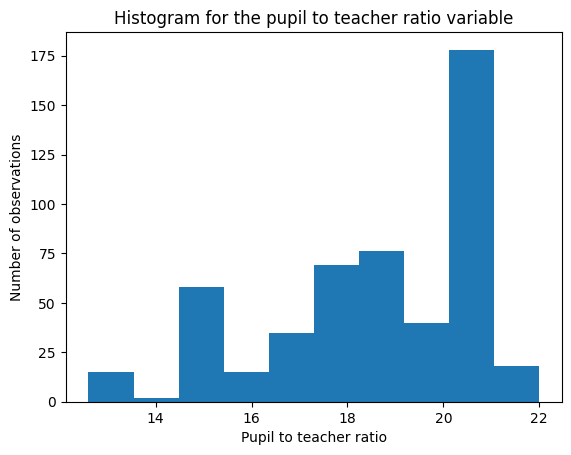

In [22]:
pyplot.hist(boston_df['PTRATIO'])
pyplot.xlabel('Pupil to teacher ratio')
pyplot.ylabel('Number of observations')
pyplot.title("Histogram for the pupil to teacher ratio variable")
pyplot.show()

Task 3: Use the appropriate tests to answer the questions provided.

Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)

H0: there is no difference in mdeian values of houses on the tract of Charles river or away

H1: there is no difference in mdeian values of houses on the tract of Charles river or away

In [23]:
scipy.stats.ttest_ind(boston_df[boston_df['CHAS'] == 1]['MEDV'],
                   boston_df[boston_df['CHAS'] == 0]['MEDV'], equal_var = True)

TtestResult(statistic=3.996437466090509, pvalue=7.390623170519905e-05, df=504.0)

Conclusion: since p-value is less than alpha value 0.05, we reject the null hypothesis, which suggests there is no statistically significant difference between in median value of houses bounded by the Charles river or not, thus there is a difference.

Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)?



H0: Equal variance across groupsps

H1: Unequal variance across groups

In [25]:
less_35 = boston_df[boston_df['age_group'] == '35 years and younger']['MEDV']
between_35_70 = boston_df[boston_df['age_group'] == 'between 35 and 70 years']['MEDV']
greater_70 = boston_df[boston_df['age_group'] == '70 years and older']['MEDV']

In [27]:
f_statistic, p_value = scipy.stats.f_oneway(less_35, between_35_70, greater_70)
print("F_Statistic: {0}, P-Value: {1}".format(f_statistic,p_value))

F_Statistic: 36.40764999196599, P-Value: 1.7105011022702984e-15


Conclusion: Since p-value is less than alpha value 0.05, we reject null hypothesis which suggests there is no statistically significant difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE).

Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)

H0: Nitric oxide concentration is not correlated to non-retial business acres per town


H1: Nitric oxide concentration is correlated to non-retial business acres per town

In [28]:
scipy.stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])

PearsonRResult(statistic=0.7636514469209192, pvalue=7.913361061210442e-98)

Conclusion: Since the P-value is less than alpha (0.05), we reject the null hypothesis and conclude that there is correlation between Nitric Oxide conentration with the acres of non-retail business.

What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)

 H0: Weighted distance to the five Boston employment centres (DIS) has no impact on the median value of owner occupied homes (MEDV).

H1: Weighted distance to the five Boston employment centres (DIS) has an impact on the median value of owner occupied homes (MEDV).

In [29]:
X = boston_df['DIS']
y = boston_df['MEDV']
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
predictions = model.predict(X)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Wed, 21 Feb 2024   Prob (F-statistic):           1.21e-08
Time:                        15:28:29   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Conclusion: As the P-value of coefficient for DIS is less than 0.05, we reject the null hypothesis and conclude that Weighted distance to the five Boston employment centres (DIS) has an impact on the median value of owner occupied homes (MEDV).